In [1]:
##############################################
# Program to implement MLP
# HW2 
##############################################
# Import all required libraries
import numpy as np
from matplotlib import pyplot as plt
import random
from math import *

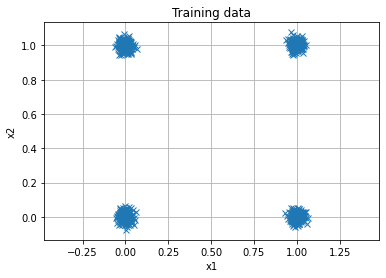

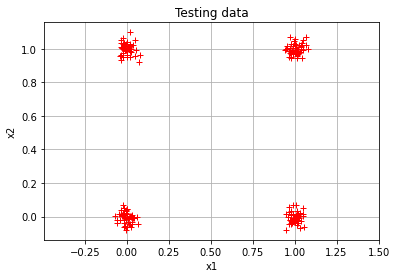

In [2]:
####
# AND
####

T = 1000
N = int(0.8*T)
M = int(0.2*T)

# setting covariance
cov = [[5e-4,0],[0,5e-4]]
coov = [[1e-3,0],[0,1e-3]]

# Generating noisy samples
mean1 = [0, 0]
trX1 = np.random.multivariate_normal(mean1, cov, int(N/4)).T # training
teX1 = np.random.multivariate_normal(mean1, coov, int(M/4)).T # testing

mean2 = [0, 1]
trX2 = np.random.multivariate_normal(mean2, cov, int(N/4)).T # training
teX2 = np.random.multivariate_normal(mean2, coov, int(M/4)).T # testing

mean3 = [1, 0]
trX3 = np.random.multivariate_normal(mean3, cov, int(N/4)).T # training
teX3 = np.random.multivariate_normal(mean3, coov, int(M/4)).T # testing

mean4 = [1, 1]
trX4 = np.random.multivariate_normal(mean4, cov, int(N/4)).T # training
teX4 = np.random.multivariate_normal(mean4, coov, int(M/4)).T # testing

# concatenating labels to the samples generated
# 0 AND 0 = 0
temp=np.array([0]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX1 = np.concatenate((trX1,temp),axis=0)
temp=np.array([0]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX1 = np.concatenate((teX1,temp),axis=0)

# 0 AND 1 = 0
temp=np.array([0]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX2 = np.concatenate((trX2,temp),axis=0)
temp=np.array([0]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX2 = np.concatenate((teX2,temp),axis=0)

# 1 AND 0 = 0
temp=np.array([0]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX3 = np.concatenate((trX3,temp),axis=0)
temp=np.array([0]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX3 = np.concatenate((teX3,temp),axis=0)

# 1 AND 1 = 1
temp=np.array([1]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX4 = np.concatenate((trX4,temp),axis=0)
temp=np.array([1]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX4 = np.concatenate((teX4,temp),axis=0)

# compiling the data
trX = np.concatenate((trX1, trX2, trX3, trX4), axis = 1).T
teX = np.concatenate((teX1, teX2, teX3, teX4), axis = 1).T

# shuffling the data
np.random.shuffle(trX)
trX=trX.T
np.random.shuffle(teX)
teX=teX.T

# Displaying the data
plt.plot(trX[0,:], trX[1,:],'x')
plt.axis('equal')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training data')
plt.show()

# Displaying the data
plt.plot(teX[0,:], teX[1,:],'r+')
plt.axis('equal')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Testing data')
plt.show()

# preparing data, for implementing algorithm
temp=np.array([1]*int(N))
temp=temp.reshape(1,int(N))
trX = np.concatenate((temp,trX),axis=0)
temp=np.array([1]*int(M))
temp=temp.reshape(1,int(M))
teX = np.concatenate((temp,teX),axis=0)

In [3]:
# extracting a subarray from trX, excluding labels
X=trX[:3,:N] #3x800

# extracting a subarray from teX, excluding labels
XX=teX[:3,:M] #3x200

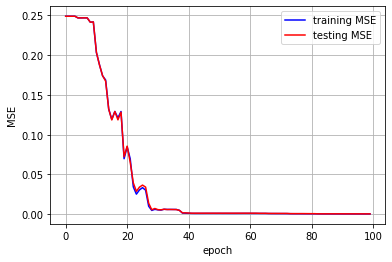

Optimal weights (corresponding to least training MSE)
alpha1: 
 [[2.37772169]
 [1.81020472]
 [4.94652526]]
alpha2: 
 [[ 7.63810284]
 [-5.35610029]
 [-5.36181196]]
beta: 
 [[  2.68054107]
 [  1.9900328 ]
 [-10.63469961]]
weights after 100 epochs
alpha1: 
 [[2.37772169]
 [1.81020472]
 [4.94652526]]
alpha2: 
 [[ 7.63810284]
 [-5.35610029]
 [-5.36181196]]
beta: 
 [[  2.68054107]
 [  1.9900328 ]
 [-10.63469961]]
Checking prediction for some arbitrary inputs
0.97 and 1.01:  0.9525741268224334
1.1 and -0.1:  0.01798620996209156
0.01 and 1.01:  0.01798620996209156
-0.01 and 0.15:  0.0024726231566347743


In [4]:
# defining non linearity
def sig(x):
  return 1/(1+exp(-x))

def sig_d(x):
  return exp(-x)/((1+exp(-x))**2)

# initialising weights
a1 = np.random.uniform(-5,5,size=(3,1)) 
a2 = np.random.uniform(-5,5,size=(3,1)) 
b = np.random.uniform(-5,5,size=(3,1)) 

# checking if any weight is initialised 0, and replacing it with 1 if true.
for i in range(3):
  if(a1[i][0]==0):
    a1[i][0]=1
  if(a2[i][0]==0):
    a2[i][0]=1
  if(b[i][0]==0):
    b[i][0]=1

# setting learning rate
g=0.05

# setting batch size
m=50

# lists for storing MSE values for training and testing data, after each epoch 
epochte=[]
epochtr=[]

# implementing algorithm
# running 100 epochs
for e in range(100):
  t = 0

  # for 1 epoch
  for j in range(int(N/m)):
    derb_R=np.array([0]*3).T
    derb_R=derb_R.reshape(3,1)
    dera1_R=np.array([0]*3).T
    dera1_R=dera1_R.reshape(3,1)
    dera2_R=np.array([0]*3).T
    dera2_R=dera2_R.reshape(3,1) 

    for i in range(t,t+m):
      x=np.array(X[:,i])
      x=x.reshape(3,1) # xi vector
      z1=sig(np.int(np.dot(a1.T,x)))
      z2=sig(np.int(np.dot(a2.T,x)))
      z=np.array([1,z1,z2]).T
      z=z.reshape(3,1) # zi vector
      y_hat=sig(np.int(np.dot(b.T,z)))
      delta=(-2)*(trX[3][i]-y_hat)*sig_d(np.int(np.dot(b.T,z))) # "error" term, deltai
      s1=delta*b[1]*sig_d(np.int(np.dot(a1.T,x))) # si1 term
      s2=delta*b[2]*sig_d(np.int(np.dot(a2.T,x))) # si2 term

      # all derivatives of Ri w.r.t b,a1,a2      
      derb_R=np.add(derb_R,delta*z)      
      dera1_R=np.add(dera1_R,s1*x)      
      dera2_R=np.add(dera2_R,s2*x)

    # update rule
    b=b-g*derb_R
    a1=a1-g*dera1_R
    a2=a2-g*dera2_R
    t+=m

  MSE_tr=0
  MSE_te=0

  # calculating MSE for 1 epoch for training data
  for i in range(N):
    x=np.array(X[:,i])
    x=x.reshape(3,1)
    z1=sig(np.int(np.dot(a1.T,x)))
    z2=sig(np.int(np.dot(a2.T,x)))
    z=np.array([1,z1,z2]).T
    z=z.reshape(3,1)
    y_hat=sig(np.int(np.dot(b.T,z)))
    MSE_tr+=(trX[3][i]-y_hat)**2
  MSE_tr/=N

  # storing the MSE
  epochtr.append(MSE_tr)

  # if its a minimum, then saving the optimal weight vectors
  if(np.min(epochtr)==MSE_tr):
    final_a1=a1
    final_a2=a2
    final_b=b

  # calculating MSE for 1 epoch for testing data
  for i in range(M):
    x=np.array(XX[:,i])
    x=x.reshape(3,1)
    z1=sig(np.int(np.dot(a1.T,x)))
    z2=sig(np.int(np.dot(a2.T,x)))    
    z=np.array([1,z1,z2]).T
    z=z.reshape(3,1)    
    y_hat=sig(np.int(np.dot(b.T,z)))
    MSE_te+=(teX[3][i]-y_hat)**2
  MSE_te/=M

  # storing the MSE
  epochte.append(MSE_te)

# Displaying the data
xaxis=range(0,100)
plt.plot(xaxis,epochtr,'b-',label="training MSE")
plt.plot(xaxis,epochte,'r-',label="testing MSE")
plt.grid(True)
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

print("Optimal weights (corresponding to least training MSE)")
print("alpha1: \n",final_a1)
print("alpha2: \n",final_a2)
print("beta: \n",final_b)
print("weights after 100 epochs")
print("alpha1: \n",a1)
print("alpha2: \n",a2)
print("beta: \n",b)

# estimator using optimal weights
def estimator(x_1,x_2):
  x_inp=np.array([1,x_1,x_2]).T
  x_inp=x_inp.reshape(3,1)
  z_1=sig(np.int(np.dot(final_a1.T,x_inp)))
  z_2=sig(np.int(np.dot(final_a2.T,x_inp)))
  z_=np.array([1,z_1,z_2]).T
  z_=z_.reshape(3,1)
  y_hat_out=sig(np.int(np.dot(final_b.T,z_)))
  return y_hat_out

# printing some estimated outputs 
print("Checking prediction for some arbitrary inputs")
print("0.97 and 1.01: ",estimator(0.97,1.01))
print("1.1 and -0.1: ",estimator(1.1,-0.1))
print("0.01 and 1.01: ",estimator(0.01,1.01))
print("-0.01 and 0.15: ",estimator(-0.01,0.15))

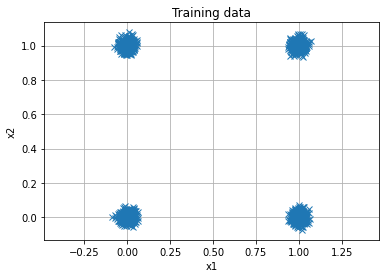

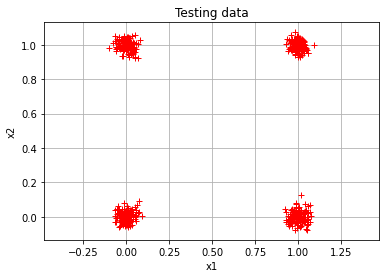

In [5]:
####
# AND
####

T = 2500
N = int(0.8*T)
M = int(0.2*T)

# setting covariance
cov = [[5e-4,0],[0,5e-4]]
coov = [[1e-3,0],[0,1e-3]]

# Generating noisy samples
mean1 = [0, 0]
trX1 = np.random.multivariate_normal(mean1, cov, int(N/4)).T # training
teX1 = np.random.multivariate_normal(mean1, coov, int(M/4)).T # testing

mean2 = [0, 1]
trX2 = np.random.multivariate_normal(mean2, cov, int(N/4)).T # training
teX2 = np.random.multivariate_normal(mean2, coov, int(M/4)).T # testing

mean3 = [1, 0]
trX3 = np.random.multivariate_normal(mean3, cov, int(N/4)).T # training
teX3 = np.random.multivariate_normal(mean3, coov, int(M/4)).T # testing

mean4 = [1, 1]
trX4 = np.random.multivariate_normal(mean4, cov, int(N/4)).T # training
teX4 = np.random.multivariate_normal(mean4, coov, int(M/4)).T # testing

# concatenating labels to the samples generated
# 0 AND 0 = 0
temp=np.array([0]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX1 = np.concatenate((trX1,temp),axis=0)
temp=np.array([0]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX1 = np.concatenate((teX1,temp),axis=0)

# 0 AND 1 = 0
temp=np.array([0]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX2 = np.concatenate((trX2,temp),axis=0)
temp=np.array([0]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX2 = np.concatenate((teX2,temp),axis=0)

# 1 AND 0 = 0
temp=np.array([0]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX3 = np.concatenate((trX3,temp),axis=0)
temp=np.array([0]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX3 = np.concatenate((teX3,temp),axis=0)

# 1 AND 1 = 1
temp=np.array([1]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX4 = np.concatenate((trX4,temp),axis=0)
temp=np.array([1]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX4 = np.concatenate((teX4,temp),axis=0)

# compiling the data
trX = np.concatenate((trX1, trX2, trX3, trX4), axis = 1).T
teX = np.concatenate((teX1, teX2, teX3, teX4), axis = 1).T

# shuffling the data
np.random.shuffle(trX)
trX=trX.T
np.random.shuffle(teX)
teX=teX.T

# Displaying the data
plt.plot(trX[0,:], trX[1,:],'x')
plt.axis('equal')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training data')
plt.show()

# Displaying the data
plt.plot(teX[0,:], teX[1,:],'r+')
plt.axis('equal')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Testing data')
plt.show()

# preparing data, for implementing algorithm
temp=np.array([1]*int(N))
temp=temp.reshape(1,int(N))
trX = np.concatenate((temp,trX),axis=0)
temp=np.array([1]*int(M))
temp=temp.reshape(1,int(M))
teX = np.concatenate((temp,teX),axis=0)

In [6]:
# extracting a subarray from trX, excluding labels
X=trX[:3,:N] #3x2000

# extracting a subarray from teX, excluding labels
XX=teX[:3,:M] #3x500

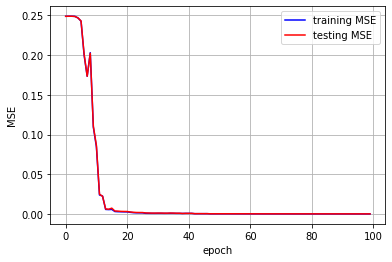

Optimal weights (corresponding to least training MSE)
alpha1: 
 [[-2.98531959]
 [-4.95516759]
 [ 4.04744223]]
alpha2: 
 [[ 8.26052007]
 [-5.27618422]
 [-6.30665445]]
beta: 
 [[  4.84721464]
 [ -3.30841259]
 [-10.62666218]]
weights after 100 epochs
alpha1: 
 [[-2.98531959]
 [-4.95516759]
 [ 4.04744223]]
alpha2: 
 [[ 8.26052007]
 [-5.27618422]
 [-6.30665445]]
beta: 
 [[  4.84721464]
 [ -3.30841259]
 [-10.62666218]]
Checking prediction for some arbitrary inputs
0.97 and 1.01:  0.9820137900379085
1.1 and -0.1:  0.0066928509242848554
0.01 and 1.01:  0.0066928509242848554
-0.01 and 0.15:  0.0024726231566347743


In [7]:
# defining non linearity
def sig(x):
  return 1/(1+exp(-x))

def sig_d(x):
  return exp(-x)/((1+exp(-x))**2)

# initialising weights
a1 = np.random.uniform(-5,5,size=(3,1)) 
a2 = np.random.uniform(-5,5,size=(3,1)) 
b = np.random.uniform(-5,5,size=(3,1)) 

# checking if any weight is initialised 0, and replacing it with 1 if true.
for i in range(3):
  if(a1[i][0]==0):
    a1[i][0]=1
  if(a2[i][0]==0):
    a2[i][0]=1
  if(b[i][0]==0):
    b[i][0]=1

# setting learning rate
g=0.05

# setting batch size
m=50

# lists for storing MSE values for training and testing data, after each epoch 
epochte=[]
epochtr=[]

# implementing algorithm
# running 100 epochs
for e in range(100):
  t = 0

  # for 1 epoch
  for j in range(int(N/m)):
    derb_R=np.array([0]*3).T
    derb_R=derb_R.reshape(3,1)
    dera1_R=np.array([0]*3).T
    dera1_R=dera1_R.reshape(3,1)
    dera2_R=np.array([0]*3).T
    dera2_R=dera2_R.reshape(3,1) 

    for i in range(t,t+m):
      x=np.array(X[:,i])
      x=x.reshape(3,1) # xi vector
      z1=sig(np.int(np.dot(a1.T,x)))
      z2=sig(np.int(np.dot(a2.T,x)))
      z=np.array([1,z1,z2]).T
      z=z.reshape(3,1) # zi vector
      y_hat=sig(np.int(np.dot(b.T,z)))
      delta=(-2)*(trX[3][i]-y_hat)*sig_d(np.int(np.dot(b.T,z))) # "error" term, deltai
      s1=delta*b[1]*sig_d(np.int(np.dot(a1.T,x))) # si1 term
      s2=delta*b[2]*sig_d(np.int(np.dot(a2.T,x))) # si1 term

      # all derivatives of Ri w.r.t b,a1,a2      
      derb_R=np.add(derb_R,delta*z)      
      dera1_R=np.add(dera1_R,s1*x)      
      dera2_R=np.add(dera2_R,s2*x)

    # update rule
    b=b-g*derb_R
    a1=a1-g*dera1_R
    a2=a2-g*dera2_R
    t+=m

  MSE_tr=0
  MSE_te=0

  # calculating MSE for 1 epoch for training data
  for i in range(N):
    x=np.array(X[:,i])
    x=x.reshape(3,1)
    z1=sig(np.int(np.dot(a1.T,x)))
    z2=sig(np.int(np.dot(a2.T,x)))
    z=np.array([1,z1,z2]).T
    z=z.reshape(3,1)
    y_hat=sig(np.int(np.dot(b.T,z)))
    MSE_tr+=(trX[3][i]-y_hat)**2
  MSE_tr/=N

  # storing the MSE
  epochtr.append(MSE_tr)

  # if its a minimum, then saving the optimal weight vectors
  if(np.min(epochtr)==MSE_tr):
    final_a1=a1
    final_a2=a2
    final_b=b

  # calculating MSE for 1 epoch for testing data
  for i in range(M):
    x=np.array(XX[:,i])
    x=x.reshape(3,1)
    z1=sig(np.int(np.dot(a1.T,x)))
    z2=sig(np.int(np.dot(a2.T,x)))    
    z=np.array([1,z1,z2]).T
    z=z.reshape(3,1)    
    y_hat=sig(np.int(np.dot(b.T,z)))
    MSE_te+=(teX[3][i]-y_hat)**2
  MSE_te/=M

  # storing the MSE
  epochte.append(MSE_te)

# Displaying the data
xaxis=range(0,100)
plt.plot(xaxis,epochtr,'b-',label="training MSE")
plt.plot(xaxis,epochte,'r-',label="testing MSE")
plt.grid(True)
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

print("Optimal weights (corresponding to least training MSE)")
print("alpha1: \n",final_a1)
print("alpha2: \n",final_a2)
print("beta: \n",final_b)
print("weights after 100 epochs")
print("alpha1: \n",a1)
print("alpha2: \n",a2)
print("beta: \n",b)

# estimator using optimal weights
def estimator(x_1,x_2):
  x_inp=np.array([1,x_1,x_2]).T
  x_inp=x_inp.reshape(3,1)
  z_1=sig(np.int(np.dot(final_a1.T,x_inp)))
  z_2=sig(np.int(np.dot(final_a2.T,x_inp)))
  z_=np.array([1,z_1,z_2]).T
  z_=z_.reshape(3,1)
  y_hat_out=sig(np.int(np.dot(final_b.T,z_)))
  return y_hat_out

# printing some estimated outputs 
print("Checking prediction for some arbitrary inputs")
print("0.97 and 1.01: ",estimator(0.97,1.01))
print("1.1 and -0.1: ",estimator(1.1,-0.1))
print("0.01 and 1.01: ",estimator(0.01,1.01))
print("-0.01 and 0.15: ",estimator(-0.01,0.15))

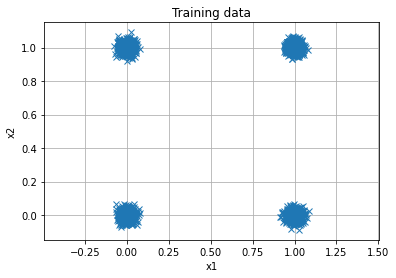

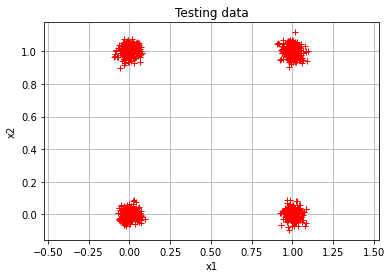

In [8]:
####
# AND
####

T = 5000
N = int(0.8*T)
M = int(0.2*T)

# setting covariance
cov = [[5e-4,0],[0,5e-4]]
coov = [[1e-3,0],[0,1e-3]]

# Generating noisy samples
mean1 = [0, 0]
trX1 = np.random.multivariate_normal(mean1, cov, int(N/4)).T # training
teX1 = np.random.multivariate_normal(mean1, coov, int(M/4)).T # testing

mean2 = [0, 1]
trX2 = np.random.multivariate_normal(mean2, cov, int(N/4)).T # training
teX2 = np.random.multivariate_normal(mean2, coov, int(M/4)).T # testing

mean3 = [1, 0]
trX3 = np.random.multivariate_normal(mean3, cov, int(N/4)).T # training
teX3 = np.random.multivariate_normal(mean3, coov, int(M/4)).T # testing

mean4 = [1, 1]
trX4 = np.random.multivariate_normal(mean4, cov, int(N/4)).T # training
teX4 = np.random.multivariate_normal(mean4, coov, int(M/4)).T # testing

# concatenating labels to the samples generated
# 0 AND 0 = 0
temp=np.array([0]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX1 = np.concatenate((trX1,temp),axis=0)
temp=np.array([0]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX1 = np.concatenate((teX1,temp),axis=0)

# 0 AND 1 = 0
temp=np.array([0]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX2 = np.concatenate((trX2,temp),axis=0)
temp=np.array([0]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX2 = np.concatenate((teX2,temp),axis=0)

# 1 AND 0 = 0
temp=np.array([0]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX3 = np.concatenate((trX3,temp),axis=0)
temp=np.array([0]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX3 = np.concatenate((teX3,temp),axis=0)

# 1 AND 1 = 1
temp=np.array([1]*int(N/4)) 
temp=temp.reshape(1,int(N/4))
trX4 = np.concatenate((trX4,temp),axis=0)
temp=np.array([1]*int(M/4)) 
temp=temp.reshape(1,int(M/4))
teX4 = np.concatenate((teX4,temp),axis=0)

# compiling the data
trX = np.concatenate((trX1, trX2, trX3, trX4), axis = 1).T
teX = np.concatenate((teX1, teX2, teX3, teX4), axis = 1).T

# shuffling the data
np.random.shuffle(trX)
trX=trX.T
np.random.shuffle(teX)
teX=teX.T

# Displaying the data
plt.plot(trX[0,:], trX[1,:],'x')
plt.axis('equal')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training data')
plt.show()

# Displaying the data
plt.plot(teX[0,:], teX[1,:],'r+')
plt.axis('equal')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Testing data')
plt.show()

# preparing data, for implementing algorithm
temp=np.array([1]*int(N))
temp=temp.reshape(1,int(N))
trX = np.concatenate((temp,trX),axis=0)
temp=np.array([1]*int(M))
temp=temp.reshape(1,int(M))
teX = np.concatenate((temp,teX),axis=0)

In [9]:
# extracting a subarray from trX, excluding labels
X=trX[:3,:N] #3x4000

# extracting a subarray from teX, excluding labels
XX=teX[:3,:M] #3x1000

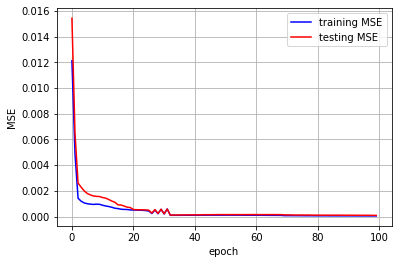

Optimal weights (corresponding to least training MSE)
alpha1: 
 [[ 7.09058993]
 [-4.98994376]
 [-5.19755916]]
alpha2: 
 [[ 5.61499742]
 [-4.30275605]
 [-4.23696577]]
beta: 
 [[ 6.35863712]
 [-8.79709719]
 [-6.84047961]]
weights after 100 epochs
alpha1: 
 [[ 7.09058993]
 [-4.98994376]
 [-5.19755916]]
alpha2: 
 [[ 5.61499742]
 [-4.30275605]
 [-4.23696577]]
beta: 
 [[ 6.35863712]
 [-8.79709719]
 [-6.84047961]]
Checking prediction for some arbitrary inputs
0.97 and 1.01:  0.9820137900379085
1.1 and -0.1:  0.0024726231566347743
0.01 and 1.01:  0.0066928509242848554
-0.01 and 0.15:  0.00012339457598623172


In [10]:
# defining non linearity
def sig(x):
  return 1/(1+exp(-x))

def sig_d(x):
  return exp(-x)/((1+exp(-x))**2)

# initialising weights
a1 = np.random.uniform(-5,5,size=(3,1)) 
a2 = np.random.uniform(-5,5,size=(3,1)) 
b = np.random.uniform(-5,5,size=(3,1)) 

# checking if any weight is initialised 0, and replacing it with 1 if true.
for i in range(3):
  if(a1[i][0]==0):
    a1[i][0]=1
  if(a2[i][0]==0):
    a2[i][0]=1
  if(b[i][0]==0):
    b[i][0]=1

# setting learning rate
g=0.05

# setting batch size
m=50

# lists for storing MSE values for training and testing data, after each epoch 
epochte=[]
epochtr=[]

# implementing algorithm
# running 100 epochs
for e in range(100):
  t = 0

  # for 1 epoch
  for j in range(int(N/m)):
    derb_R=np.array([0]*3).T
    derb_R=derb_R.reshape(3,1)
    dera1_R=np.array([0]*3).T
    dera1_R=dera1_R.reshape(3,1)
    dera2_R=np.array([0]*3).T
    dera2_R=dera2_R.reshape(3,1) 

    for i in range(t,t+m):
      x=np.array(X[:,i])
      x=x.reshape(3,1) # xi vector
      z1=sig(np.int(np.dot(a1.T,x)))
      z2=sig(np.int(np.dot(a2.T,x)))
      z=np.array([1,z1,z2]).T
      z=z.reshape(3,1) # zi vector
      y_hat=sig(np.int(np.dot(b.T,z)))
      delta=(-2)*(trX[3][i]-y_hat)*sig_d(np.int(np.dot(b.T,z))) # "error" term, deltai
      s1=delta*b[1]*sig_d(np.int(np.dot(a1.T,x))) # si1 term
      s2=delta*b[2]*sig_d(np.int(np.dot(a2.T,x))) # si2 term

      # all derivatives of Ri w.r.t b,a1,a2      
      derb_R=np.add(derb_R,delta*z)      
      dera1_R=np.add(dera1_R,s1*x)      
      dera2_R=np.add(dera2_R,s2*x)

    # update rule
    b=b-g*derb_R
    a1=a1-g*dera1_R
    a2=a2-g*dera2_R
    t+=m

  MSE_tr=0
  MSE_te=0

  # calculating MSE for 1 epoch for training data
  for i in range(N):
    x=np.array(X[:,i])
    x=x.reshape(3,1) 
    z1=sig(np.int(np.dot(a1.T,x)))
    z2=sig(np.int(np.dot(a2.T,x)))
    z=np.array([1,z1,z2]).T
    z=z.reshape(3,1) 
    y_hat=sig(np.int(np.dot(b.T,z)))
    MSE_tr+=(trX[3][i]-y_hat)**2
  MSE_tr/=N

  # storing the MSE
  epochtr.append(MSE_tr)

  # if its a minimum, then saving the optimal weight vectors
  if(np.min(epochtr)==MSE_tr):
    final_a1=a1
    final_a2=a2
    final_b=b

  # calculating MSE for 1 epoch for testing data
  for i in range(M):
    x=np.array(XX[:,i])
    x=x.reshape(3,1)
    z1=sig(np.int(np.dot(a1.T,x)))
    z2=sig(np.int(np.dot(a2.T,x)))    
    z=np.array([1,z1,z2]).T
    z=z.reshape(3,1)    
    y_hat=sig(np.int(np.dot(b.T,z)))
    MSE_te+=(teX[3][i]-y_hat)**2
  MSE_te/=M

  # storing the MSE
  epochte.append(MSE_te)

# Displaying the data
xaxis=range(0,100)
plt.plot(xaxis,epochtr,'b-',label="training MSE")
plt.plot(xaxis,epochte,'r-',label="testing MSE")
plt.grid(True)
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

print("Optimal weights (corresponding to least training MSE)")
print("alpha1: \n",final_a1)
print("alpha2: \n",final_a2)
print("beta: \n",final_b)
print("weights after 100 epochs")
print("alpha1: \n",a1)
print("alpha2: \n",a2)
print("beta: \n",b)

# estimator using optimal weights
def estimator(x_1,x_2):
  x_inp=np.array([1,x_1,x_2]).T
  x_inp=x_inp.reshape(3,1)
  z_1=sig(np.int(np.dot(final_a1.T,x_inp)))
  z_2=sig(np.int(np.dot(final_a2.T,x_inp)))
  z_=np.array([1,z_1,z_2]).T
  z_=z_.reshape(3,1)
  y_hat_out=sig(np.int(np.dot(final_b.T,z_)))
  return y_hat_out

# printing some estimated outputs 
print("Checking prediction for some arbitrary inputs")
print("0.97 and 1.01: ",estimator(0.97,1.01))
print("1.1 and -0.1: ",estimator(1.1,-0.1))
print("0.01 and 1.01: ",estimator(0.01,1.01))
print("-0.01 and 0.15: ",estimator(-0.01,0.15))

In [11]:
print("Few observations and findings")
print("1. The model is a \'good fit\' for all 3 cases of T=1000,2500,5000, as the training and testing MSE converge to 0.")
print("2. The rate of convergence increases as T increases.")
print("3. For T=1000 the training and testing MSE gradually converge to 0.")
print("4. For T=5000 the training and testing MSE rapidly converge to 0.")
print("5. For T=2500, the rate of convergence is midway of the above two.")
print("6. The testing and training MSE are almost identical, with testing MSE being slightly higher than training MSE.")
print("7. The reason for this might be that the training and testing data which have been generated have many repeated/close values.")
print("8. Increasing the covariance during generation shows that the plots move apart (but they finally converge to 0), proving that the merging of plots is due to repetition of data.")
print("9. The above code has low values of variance, as the question stated to perturb the inputs only \'slightly\'.")

Few observations and findings
1. The model is a 'good fit' for all 3 cases of T=1000,2500,5000, as the training and testing MSE converge to 0.
2. The rate of convergence increases as T increases.
3. For T=1000 the training and testing MSE gradually converge to 0.
4. For T=5000 the training and testing MSE rapidly converge to 0.
5. For T=2500, the rate of convergence is midway of the above two.
6. The testing and training MSE are almost identical, with testing MSE being slightly higher than training MSE.
7. The reason for this might be that the training and testing data which have been generated have many repeated/close values.
8. Increasing the covariance during generation shows that the plots move apart (but they finally converge to 0), proving that the merging of plots is due to repetition of data.
9. The above code has low values of variance, as the question stated to perturb the inputs only 'slightly'.
